In [4]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv("../data/raw/admission.csv")
df=df.drop(['Serial No.'], axis=1)
df = df.rename(columns={
    "GRE Score": "GRE_Score",
    "TOEFL Score": "TOEFL_Score",
    "University Rating": "University_Rating",
    "Chance of Admit ": "Chance_of_Admit"
})
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

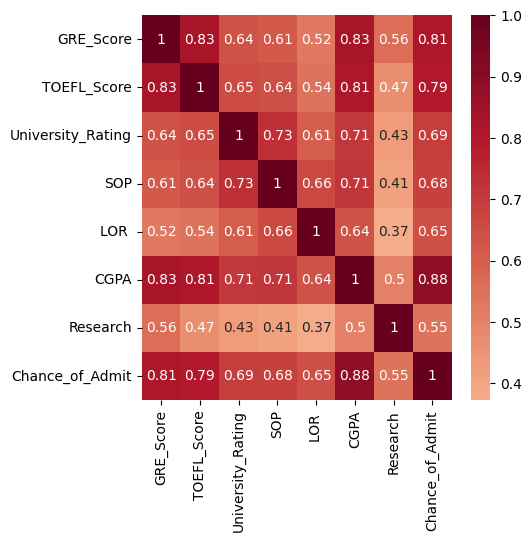

In [8]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', center=0);


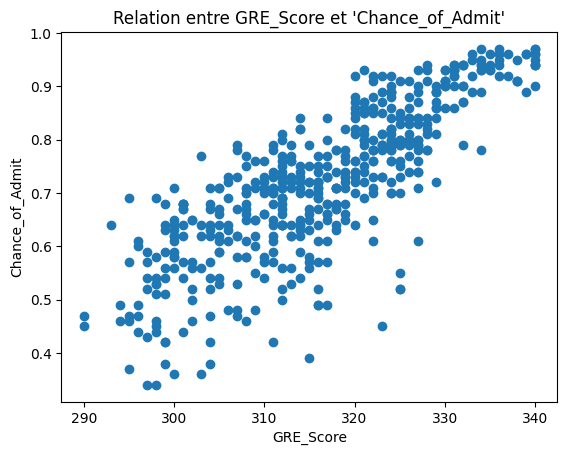

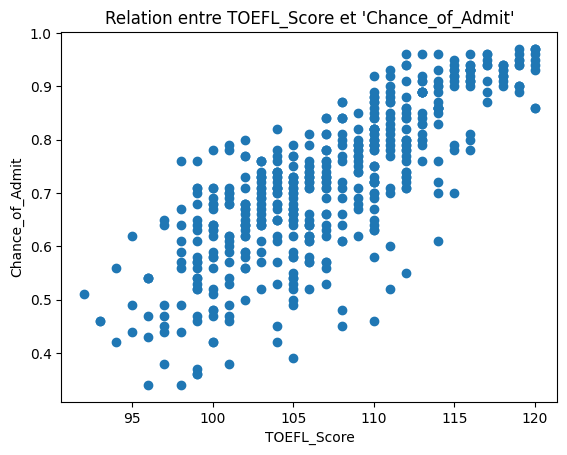

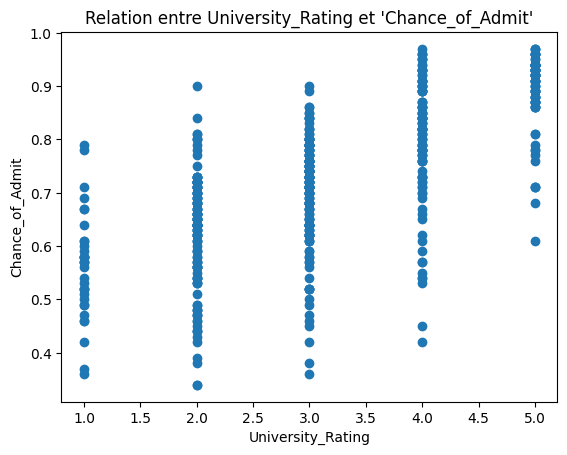

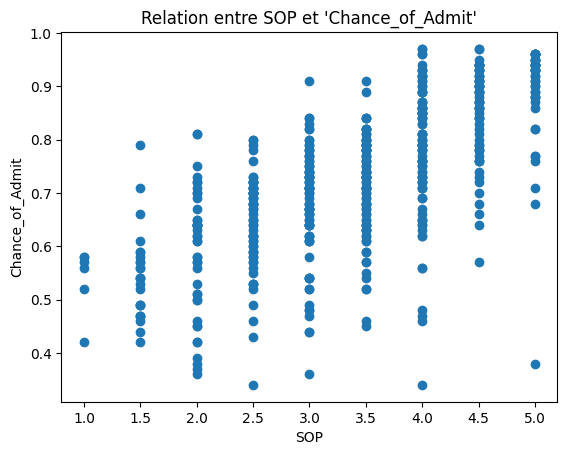

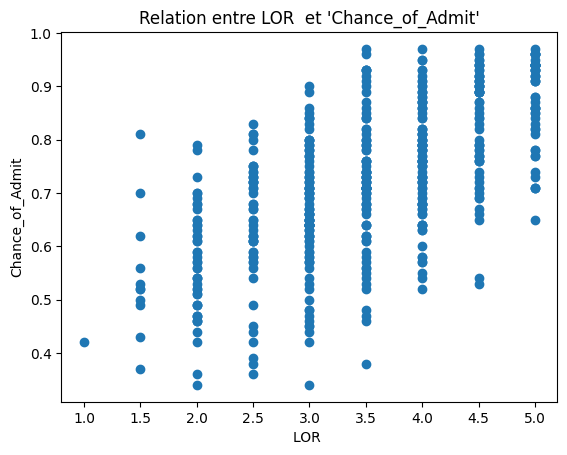

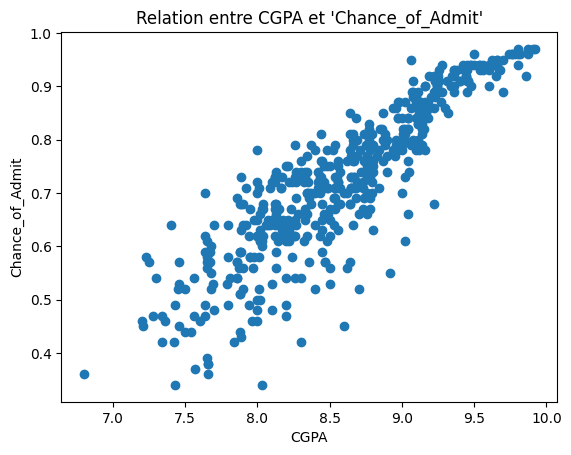

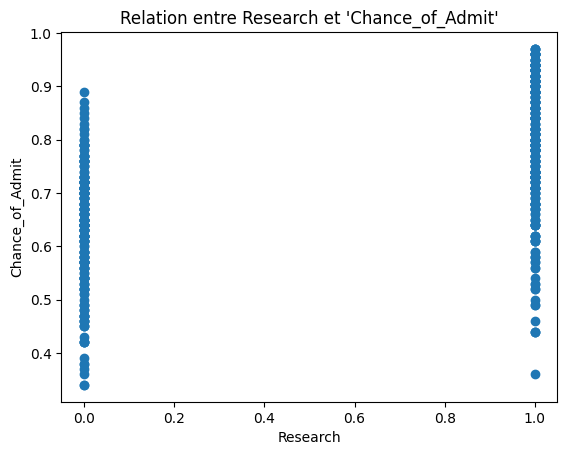

In [9]:

for col in df.columns:
    if col != "Chance_of_Admit":
        plt.scatter(df[col], df["Chance_of_Admit"])
        plt.xlabel(col)
        plt.ylabel("Chance_of_Admit")
        plt.title(f"Relation entre {col} et 'Chance_of_Admit'")
        plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split

X = df.drop('Chance_of_Admit', axis=1)
y = df['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=789)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Score train (R2): {:.2%}".format(model.score(X_train, y_train)))
print("Score test (R2): {:.2%}".format(model.score(X_test, y_test)))
print(cross_val_score(model,X_train,y_train).mean())

Score train (R2): 83.13%
Score test (R2): 78.48%
0.8240773463077415


In [41]:
from sklearn.metrics import r2_score
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7848469111656612


Score train (R2): 83.13%
Score test (R2): 78.37%


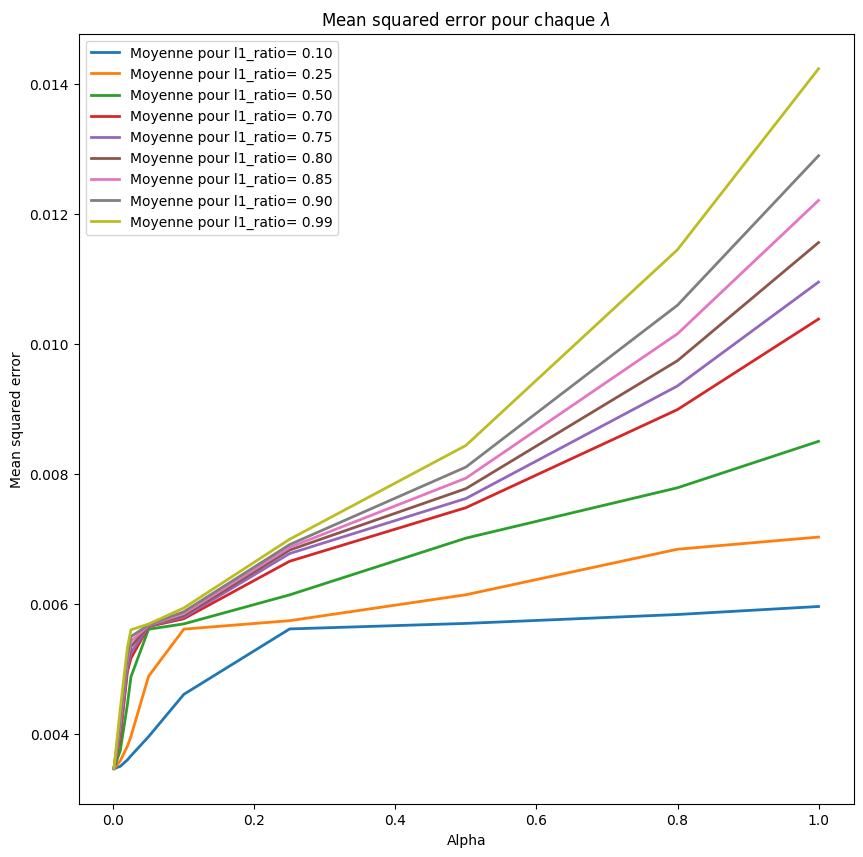

In [31]:
from sklearn.linear_model import  ElasticNetCV
model_en = ElasticNetCV(
    cv=8, 
    l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
    alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
)
model_en.fit(X_train, y_train)
alphas = model_en.alphas_
plt.figure(figsize=(10, 10))
for i in range(model_en.mse_path_.shape[0]) :
    plt.plot(alphas, model_en.mse_path_[i,:,:].mean(axis=1),
             label='Moyenne pour l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth=2)
plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\\lambda$')
plt.legend();

print("Score train (R2): {:.2%}".format(model_en.score(X_train, y_train)))
print("Score test (R2): {:.2%}".format(model_en.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train) 

print('alpha sélectionné par c-v :', ridge_reg.alpha_)
print('score train :', ridge_reg.score(X_train, y_train))
print('score test :', ridge_reg.score(X_test, y_test))

alpha sélectionné par c-v : 0.7
score train : 0.8313252391323676
score test : 0.7843264911180895


coefficients estimés par le modèle :  [0.00749226 0.0042133  0.         0.         0.         0.
 0.        ]


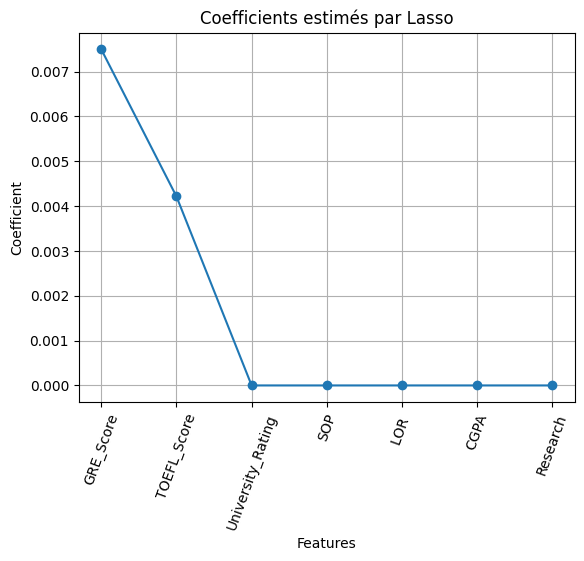

Score train (R2): 69.96%
Score test (R2): 63.88%


In [32]:
from sklearn.linear_model import Lasso
lasso_r = Lasso(alpha=0.1)
lasso_r.fit(X_train, y_train)

print("coefficients estimés par le modèle : ", lasso_r.coef_)
feature_columns = [col for col in df.columns if col != "Chance_of_Admit"]
lasso_coef = lasso_r.coef_
plt.plot(range(len(feature_columns)), lasso_coef, marker='o')
plt.xticks(range(len(feature_columns)), feature_columns, rotation=70)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Coefficients estimés par Lasso")
plt.grid(True)
plt.show()



print("Score train (R2): {:.2%}".format(lasso_r.score(X_train, y_train)))
print("Score test (R2): {:.2%}".format(lasso_r.score(X_test, y_test)))


/home/ubuntu/examen_bentoml/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02445958785779112, tolerance: 0.02157557
  model = cd_fast.enet_coordinate_descent_gram(
/home/ubuntu/examen_bentoml/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38333186715955625, tolerance: 0.02157557
  model = cd_fast.enet_coordinate_descent_gram(
/home/ubuntu/examen_bentoml/venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07915508481520561, tolerance: 0.02157557
  model = cd_fast.enet_coordinate_descent_gram(
/home/ubuntu/examen_bentoml/venv/lib/python3.12/site

Score train (R2): 83.02%
Score test (R2): 77.91%


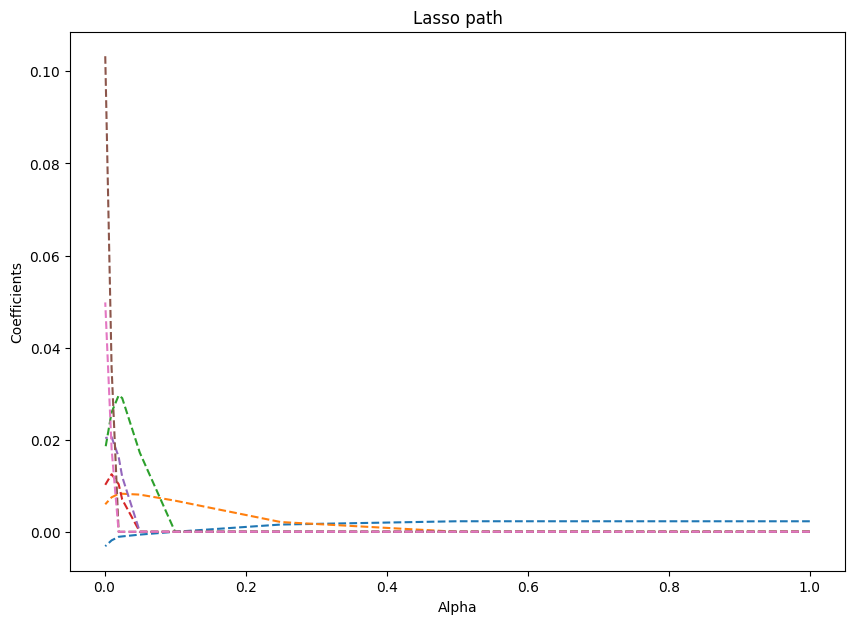

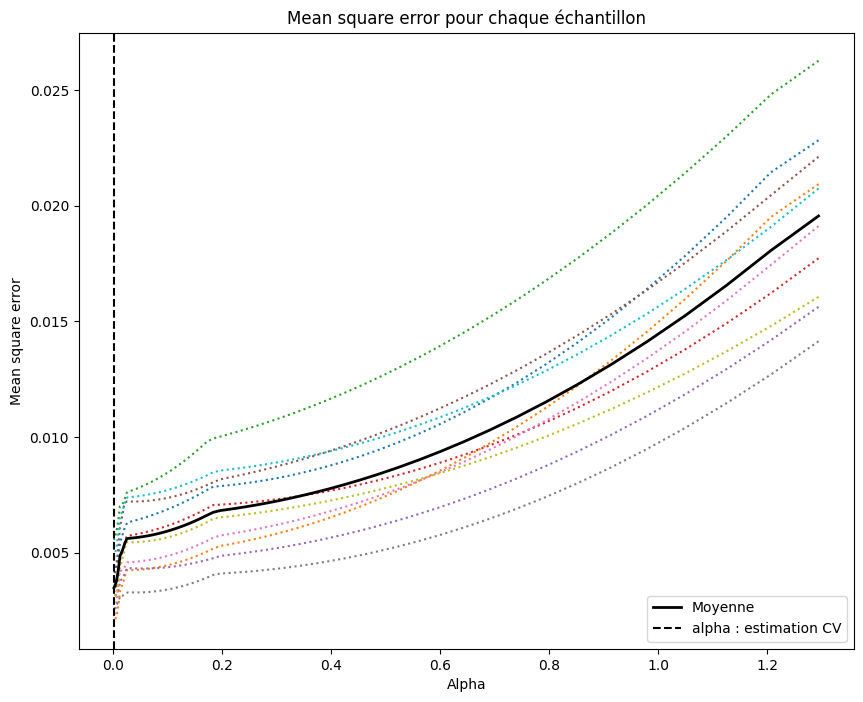

In [33]:
from sklearn.linear_model import lasso_path
mes_alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)
coefs_lasso.shape

plt.figure(figsize=(10, 7))
for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path');

from sklearn.linear_model import LassoCV
model_lasso = LassoCV(cv=10).fit(X_train, y_train)
alphas = model_lasso.alphas_
plt.figure(figsize=(10, 8))
plt.plot(alphas, model_lasso.mse_path_, ':')
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k', label='Moyenne', linewidth=2)
plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')
plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();

print("Score train (R2): {:.2%}".format(model_lasso.score(X_train, y_train)))
print("Score test (R2): {:.2%}".format(model_lasso.score(X_test, y_test)))


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=1000, max_depth=7, learning_rate=0.05)
model_xgb.fit(X_train, y_train)
print("Score train:", model_xgb.score(X_train, y_train))
print("Score test:", model_xgb.score(X_test, y_test))


Score train: 0.9997888547143862
Score test: 0.7624261662783189


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    cv=5,
    scoring='r2'
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 500}
Best R2 score: 0.794386164147373


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialisation du modèle
model_gbr = GradientBoostingRegressor(
    n_estimators=500,
    max_depth=3,
    max_features='sqrt',
    learning_rate=0.01,
    validation_fraction=0.5
)

# Entraînement du modèle
model_gbr.fit(X_train, y_train)

# Calcul des scores R2
print("Score train (R2): {:.2%}".format(model_gbr.score(X_train, y_train)))
print("Score test (R2): {:.2%}".format(model_gbr.score(X_test, y_test)))


Score train (R2): 88.38%
Score test (R2): 80.48%


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialisation du modèle
model_gbr = GradientBoostingRegressor(
    n_estimators=500,
    max_depth=3,
    max_features='sqrt',
    learning_rate=0.01,
    validation_fraction=0.5
)

# Entraînement du modèle
model_gbr.fit(X_train_scaled, y_train)

# Calcul des scores R2
print("Score train (R2): {:.2%}".format(model_gbr.score(X_train_scaled, y_train)))
print("Score test (R2): {:.2%}".format(model_gbr.score(X_test_scaled, y_test)))


Score train (R2): 88.39%
Score test (R2): 80.38%


In [59]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle
model_xgb = XGBRegressor()

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [100, 500, 1000],  # Nombre d'estimateurs
    'max_depth': [3, 5, 7],             # Profondeur maximale des arbres
    'learning_rate': [0.01, 0.05, 0.1], # Taux d'apprentissage
    'subsample': [0.8, 0.9, 1.0],       # Proportion d'échantillons utilisés pour l'entraînement
    'colsample_bytree': [0.8, 0.9, 1.0] # Proportion de caractéristiques utilisées par arbre
}

# GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche sur grille
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres et le score R2 correspondant
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score (R2) : {:.2%}".format(grid_search.best_score_))

# Vous pouvez également récupérer les scores sur les ensembles d'entraînement et de test avec les meilleurs paramètres
best_model = grid_search.best_estimator_
print("Score train avec meilleur modèle : {:.2%}".format(best_model.score(X_train_scaled, y_train)))
print("Score test avec meilleur modèle : {:.2%}".format(best_model.score(X_test_scaled, y_test)))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Meilleurs paramètres :  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Meilleur score (R2) : 79.28%
Score train avec meilleur modèle : 88.59%
Score test avec meilleur modèle : 80.44%


In [66]:
from xgboost import XGBRegressor
model_xgb_scaled = XGBRegressor(
        colsample_bytree=0.8,
        learning_rate= 0.01,
        max_depth=3,
        n_estimators=500,
        subsample=0.8
    )
model_xgb_scaled.fit(X_train_scaled, y_train)
print("Score train:", model_xgb_scaled.score(X_train_scaled, y_train))
print("Score test:", model_xgb_scaled.score(X_test_scaled, y_test))

Score train: 0.8858606314305596
Score test: 0.8044038456187284


In [63]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Définition du modèle
model_xgb = XGBRegressor()

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [100, 500, 1000],  # Nombre d'estimateurs
    'max_depth': [3, 5, 7],             # Profondeur maximale des arbres
    'learning_rate': [0.01, 0.05, 0.1], # Taux d'apprentissage
    'subsample': [0.8, 0.9, 1.0],       # Proportion d'échantillons utilisés pour l'entraînement
    'colsample_bytree': [0.8, 0.9, 1.0] # Proportion de caractéristiques utilisées par arbre
}

# GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Entraîner le modèle avec la recherche sur grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score R2 correspondant
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score (R2) : {:.2%}".format(grid_search.best_score_))

# Vous pouvez également récupérer les scores sur les ensembles d'entraînement et de test avec les meilleurs paramètres
best_model = grid_search.best_estimator_
print("Score train avec meilleur modèle : {:.2%}".format(best_model.score(X_train, y_train)))
print("Score test avec meilleur modèle : {:.2%}".format(best_model.score(X_test, y_test)))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Meilleurs paramètres :  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Meilleur score (R2) : 79.28%
Score train avec meilleur modèle : 88.59%
Score test avec meilleur modèle : 80.44%


In [ ]:
best_model = grid_search.best_estimator_
from xgboost import XGBRegressor
model_xgb = XGBRegressor(
        colsample_bytree=0.8,
        learning_rate= 0.01,
        max_depth=3,
        n_estimators=500,
        subsample=0.8
    )
model_xgb.fit(X_train, y_train)
print("Score train:", model_xgb.score(X_train, y_train))
print("Score test:", model_xgb.score(X_test, y_test))

Score train: 0.8858606314305596
Score test: 0.8044038456187284


In [67]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model_xgb = XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Afficher les scores sur les ensembles d'entraînement et de test
print("Score train (R2): {:.2%}".format(best_model.score(X_train, y_train)))
print("Score test (R2): {:.2%}".format(best_model.score(X_test, y_test)))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found by GridSearchCV:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Score train (R2): 88.59%
Score test (R2): 80.44%
